## Importing All Necessary Libraries

In [ ]:
# Install the folium package if not already owned
!pip install folium

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import folium
from folium.plugins import HeatMap

# Goals for Visualization

1. Create a graph including the frequency of Tweets (mask-free and mask-up) compared to county population.
2. Create a data representation of education levels in each county versus mask-free and mask-up Tweets.
3. Create a representation of the frequency of mask-free versus mask-up tweets as compared to the number of COVID-19 cases for each county using the Johns Hopkins dataset.
4. Create a representation of the New York Times Mask Usage data against the Johns Hopkins COVID-19 confirmed cases dataset.

In [2]:
df_tc = pd.read_csv('avg_data.csv', index_col=0)
df_tc.head()

,X1,ed_rate,populations,county_x,type,FIPS,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,...,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,county,compliance_mean,cases_mean
1,0,0.24,36,Austin County TX,1,48015,0.024,0.054,0.224,0.692,...,1903,1910,1916,1925,1934,1935,1938,Austin County TX,0.2485,1923.0
2,1,0.24,36,Austin County TX,1,48015,0.024,0.054,0.224,0.692,...,1903,1910,1916,1925,1934,1935,1938,Austin County TX,0.2485,1923.0
3,2,0.24,36,Austin County TX,1,48015,0.024,0.054,0.224,0.692,...,1903,1910,1916,1925,1934,1935,1938,Austin County TX,0.2485,1923.0
4,3,0.24,36,Austin County TX,1,48015,0.024,0.054,0.224,0.692,...,1903,1910,1916,1925,1934,1935,1938,Austin County TX,0.2485,1923.0
5,4,0.24,36,Austin County TX,1,48015,0.024,0.054,0.224,0.692,...,1903,1910,1916,1925,1934,1935,1938,Austin County TX,0.2485,1923.0


/Users/abosko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

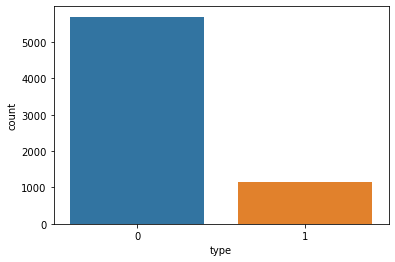

In [3]:
# Look at distribution of mask-free vs. mask-up in dataset, where 0 = mask_up and 1 = mask_free

sns.countplot('type', data = df_tc)

# Visualization idea (1) : Looking at frequency differences in "type" of tweet (mask free vs. mask up) by county

[Text(0, 0, 'Austin County TX'),
 Text(1, 0, 'New York County NY'),
 Text(2, 0, 'County of San Francisco CA'),
 Text(3, 0, 'Hudson County NJ'),
 Text(4, 0, 'Philadelphia County PA'),
 Text(5, 0, 'Alexandria VA'),
 Text(6, 0, 'Baltimore MD'),
 Text(7, 0, 'Cook County IL'),
 Text(8, 0, 'St. Louis County MO'),
 Text(9, 0, 'Milwaukee County WI'),
 Text(10, 0, 'Denver County CO'),
 Text(11, 0, 'Orange County CA'),
 Text(12, 0, 'Pinellas County FL'),
 Text(13, 0, 'Ramsey County MN'),
 Text(14, 0, 'Wayne County, MI'),
 Text(15, 0, 'Cuyahoga County OH'),
 Text(16, 0, 'Dallas County TX'),
 Text(17, 0, 'DeKalb County GA'),
 Text(18, 0, 'Salt Lake County UT'),
 Text(19, 0, 'Marion County IN'),
 Text(20, 0, 'Jefferson County KY'),
 Text(21, 0, 'Johnson County KS'),
 Text(22, 0, 'Washington DC')]

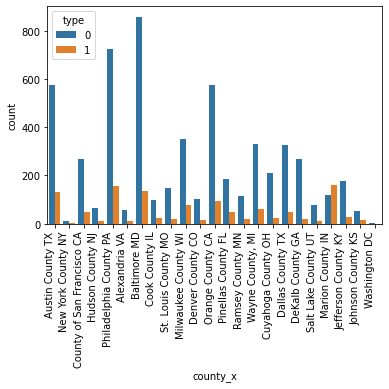

In [4]:
#Type 0 = "Mask Up", Type 1 = "Mask Free"
ax = sns.countplot(x="county_x", hue="type", data=df_tc)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

/Users/abosko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Austin County TX'),
 Text(1, 0, 'New York County NY'),
 Text(2, 0, 'County of San Francisco CA'),
 Text(3, 0, 'Hudson County NJ'),
 Text(4, 0, 'Philadelphia County PA'),
 Text(5, 0, 'Alexandria VA'),
 Text(6, 0, 'Baltimore MD'),
 Text(7, 0, 'Cook County IL'),
 Text(8, 0, 'St. Louis County MO'),
 Text(9, 0, 'Milwaukee County WI'),
 Text(10, 0, 'Denver County CO'),
 Text(11, 0, 'Orange County CA'),
 Text(12, 0, 'Pinellas County FL'),
 Text(13, 0, 'Ramsey County MN'),
 Text(14, 0, 'Wayne County, MI'),
 Text(15, 0, 'Cuyahoga County OH'),
 Text(16, 0, 'Dallas County TX'),
 Text(17, 0, 'DeKalb County GA'),
 Text(18, 0, 'Salt Lake County UT'),
 Text(19, 0, 'Marion County IN'),
 Text(20, 0, 'Jefferson County KY'),
 Text(21, 0, 'Johnson County KS'),
 Text(22, 0, 'Washington DC')]

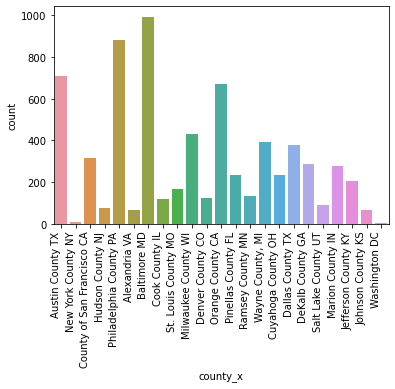

In [5]:
county_freq = sns.countplot('county_x', data = df_tc)
county_freq.set_xticklabels(county_freq.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

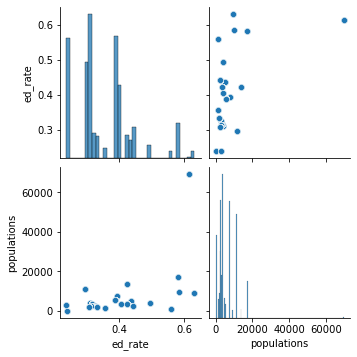

In [6]:
sns.pairplot(df_tc[['ed_rate', 'populations']])

# Visualization idea (2): Regressing education rate on tweet "type". Logistic regression, since "type" is binary. Anticipating that as education level increases, mask compliance increases.

### Creating Bar Graphs to analyze Education Rates versus Frequency of Tweets (Mask-Free vs. Mask-Up)

Text(0.5, 1.0, 'Education Rates versus Frequency of Tweets')

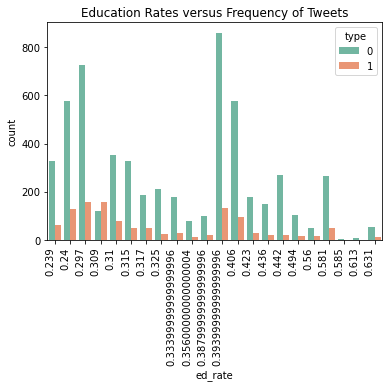

In [7]:
# Graphing the Education Rates against the Frequencies of each type of Tweet
edu = sns.countplot(x ='ed_rate', hue = 'type', data = df_tc, palette="Set2")
edu.set_xticklabels(edu.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
edu.set_title("Education Rates versus Frequency of Tweets")

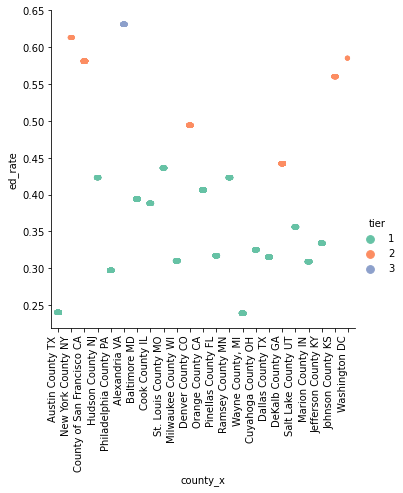

In [8]:
# Looking at the Education Rates in Each County
edu_1 = sns.catplot(x ="county_x",y = "ed_rate", hue="tier",data = df_tc, palette ="Set2")
edu_1.set_xticklabels(rotation=90, 
                          horizontalalignment='right')


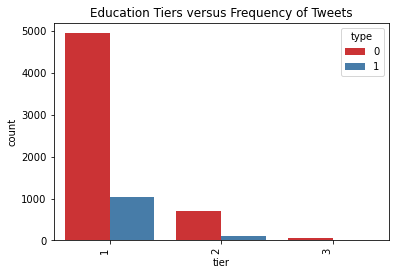

In [9]:
# Graphing the Tiers of Education against the Frequencies of each type of Tweet
tier_graph = sns.countplot(x ='tier', hue = 'type', data = df_tc, palette="Set1")
tier_graph.set_xticklabels(tier_graph.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

tier_graph.set_title("Education Tiers versus Frequency of Tweets")
new_labels = ['label 1', 'label 2']

In [10]:
x = df_tc.ed_rate
y = df_tc.type
print(y)

1       1
2       1
3       1
4       1
5       1
       ..
6857    0
6858    0
6859    0
6860    0
6861    0
Name: type, Length: 6861, dtype: int64


### Results from naive logistic regression:

In [11]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457120
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.005   
Dependent Variable: type             AIC:              6274.6036
Date:               2021-03-19 19:07 BIC:              6281.4372
No. Observations:   6861             Log-Likelihood:   -3136.3  
Df Model:           0                LL-Null:          -3120.9  
Df Residuals:       6860             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
ed_rate     -4.4535    0.0928  -47.9689  0.0000  -4.6354  -4.2715



<AxesSubplot:xlabel='ed_rate', ylabel='type'>

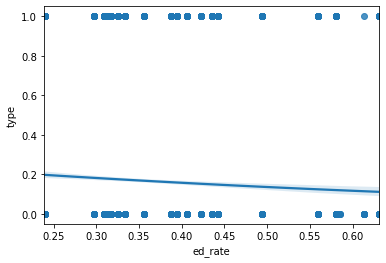

In [12]:
sns.regplot(x='ed_rate', y='type', data=df_tc, logistic=True)

### Now, using train_test_split to rerun logistic regression with training vs. test data:

In [13]:
X_ = df_tc.iloc[:, 1].values.reshape(-1, 1)  
Y_ = df_tc.iloc[:, 4].values.reshape(-1, 1)  
print(Y_)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/abosko/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [15]:
y_pred = logreg.predict(X_test)
print('The logistic regression classifier accuracy on the test set: {:.2f}'.format(logreg.score(X_test, y_test)))

The logistic regression classifier accuracy on the test set: 0.83


In [16]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1704    0]
 [ 355    0]]


So, we have 1704 correct predictions and 355 incorrect predictions.

In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1704
           1       0.00      0.00      0.00       355

    accuracy                           0.83      2059
   macro avg       0.41      0.50      0.45      2059
weighted avg       0.68      0.83      0.75      2059



/Users/abosko/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization idea (3): Create a representation of the frequency of mask-free versus mask-up tweets as compared to the number of COVID-19 cases for each county using the Johns Hopkins dataset.

In [29]:
# Read in the final dataset
tweet_cases = pd.read_csv('usage_tweet_covid.csv', index_col = [0])
tweet_cases.head()

,county_x,original_tweet,tweets_list,tweet_str,tweet_slice,tweet_text,type,UID,iso2,iso3,...,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,county_y,state,populations,ed_rate,tier,lat/lon
0,Austin County TX,['Texas’ Governor has opened up the state at 1...,['Texas’ Governor has opened up the state at 1...,['Texas’ Governor has opened up the state at 1...,w/ no mask requirement - unless the business R...,'texas governor has opened up the state at w/...,maskfree,84048015,US,USA,...,0.024,0.054,0.224,0.692,Austin,Texas,36,0.24,1,"29.816448, -96.2443467"
1,Austin County TX,['MY NASTY STORY. If you run outta toilet pape...,['Texas’ Governor has opened up the state at 1...,['MY NASTY STORY. If you run outta toilet pape...,e your mask most are washable. Do watch my son...,'my nasty story if you run outta toilet paper ...,maskfree,84048015,US,USA,...,0.024,0.054,0.224,0.692,Austin,Texas,36,0.24,1,"29.816448, -96.2443467"
2,Austin County TX,['@clmuseum tks 4rt on MY NASTY STORY. If you ...,['Texas’ Governor has opened up the state at 1...,['@clmuseum tks 4rt on MY NASTY STORY. If you ...,outta toilet paper use your mask most are wash...,'clmuseum tks rt on my nasty story if you run ...,maskfree,84048015,US,USA,...,0.024,0.054,0.224,0.692,Austin,Texas,36,0.24,1,"29.816448, -96.2443467"
3,Austin County TX,['@Tala_NoExcuses Tala tks 4like on MY NASTY S...,['Texas’ Governor has opened up the state at 1...,['@Tala_NoExcuses Tala tks 4like on MY NASTY S...,. If you run outta toilet paper use your mask ...,'talanoexcuses tala tks like on my nasty story...,maskfree,84048015,US,USA,...,0.024,0.054,0.224,0.692,Austin,Texas,36,0.24,1,"29.816448, -96.2443467"
4,Austin County TX,"[""@LouforFlatbush @jqllc @infopobn @NYCCouncil...",['Texas’ Governor has opened up the state at 1...,"[""@LouforFlatbush @jqllc @infopobn @NYCCouncil...",erhaps you have lower standards for politician...,louforflatbush jqllc infopobn nyccouncil perha...,maskfree,84048015,US,USA,...,0.024,0.054,0.224,0.692,Austin,Texas,36,0.24,1,"29.816448, -96.2443467"


In [32]:
# Heat map showing the concentration of COVID-19 cases during our time period of collected tweets

coords = []
for ind, row in tweet_cases.iterrows():
    coord = [row['Lat'], row['Long_']]
    coords.append(coord)


sim_score = []
for ind, row in tweet_cases.iterrows():
    sim_score.append(float(tweet_cases['3/10/21'][ind] + tweet_cases['3/11/21'][ind] + 
                           tweet_cases['3/12/21'][ind] + tweet_cases['3/13/21'][ind] + 
                           tweet_cases['3/14/21'][ind] + tweet_cases['3/15/21'][ind] +
                           tweet_cases['3/16/21'][ind]))

coords_sim = [coords[i] + [sim_score[i]] for i in range(len(coords))]

title = ' Density Map of COVID-19 cases from 3/10/2021 to 3/16/2021'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)   

m = folium.Map(zoom_start=4, location=[37.0902, -95.7129], tiles='CartoDB positron')
m.get_root().html.add_child(folium.Element(title_html))

HeatMap(coords_sim).add_to(m)
m.save('covid_map.html')

m

In [33]:
# Distribution of areas where tweets include the words mask free, denser is red areas
mask_free = tweet_cases.loc[tweet_cases['type'] == "maskfree"]
coords = []
for ind, row in mask_free.iterrows():
    coord = [row['Lat'], row['Long_']]
    coords.append(coord)

sim_score = [1 for j in mask_free['original_tweet']]

coords_sim = [coords[i] + [sim_score[i]] for i in range(len(coords))]

title = 'Density map for Tweets Containing Mask Free from 3/10/2021 to 3/16/2021'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)   

m = folium.Map(zoom_start=4, location=[37.0902, -95.7129], tiles='CartoDB positron')
m.get_root().html.add_child(folium.Element(title_html))

HeatMap(coords_sim).add_to(m)
m.save('mask_free_map.html')

m

In [34]:
# Distribution of areas where tweets include the words mask up, denser is red areas
mask_up = tweet_cases.loc[tweet_cases['type'] == "maskup"]
coords = []
for ind, row in mask_up.iterrows():
    coord = [row['Lat'], row['Long_']]
    coords.append(coord)

sim_score = [1 for j in mask_up['original_tweet']]

coords_sim = [coords[i] + [sim_score[i]] for i in range(len(coords))]

title = 'Density map for Tweets Containing Mask Up from 3/10/2021 to 3/16/2021'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)   

m = folium.Map(zoom_start=4, location=[37.0902, -95.7129], tiles='CartoDB positron')
m.get_root().html.add_child(folium.Element(title_html))

HeatMap(coords_sim).add_to(m)

m.save('mask_up_map.html')

m

# Visualization idea (4): Regressing average mask compliance rate on average covid cases for each county, to see if mask compliance predicts the average number of covid cases by county.

#### I created a new column, "average_case_count" that took the average of the case counts from 3/10-3/16. and made another column called 'average_compliance' that took the average of the four compliance scores for each county

In [18]:
X = df_tc.iloc[:, 19].values.reshape(-1, 1)  
Y = df_tc.iloc[:, 20].values.reshape(-1, 1)  
print(X)

[[0.2485 ]
 [0.2485 ]
 [0.2485 ]
 ...
 [0.24725]
 [0.24725]
 [0.24725]]


In [19]:
linear_mod = LinearRegression()  
linear_mod.fit(X, Y)  
Y_pred = linear_mod.predict(X)  

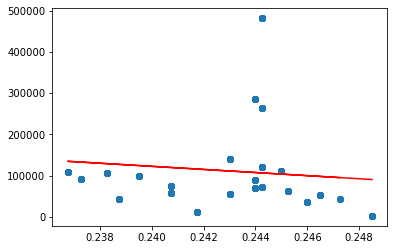

In [20]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [21]:
X = df_tc.compliance_mean
y = df_tc.cases_mean

X_ = sm.add_constant(X)
est = sm.OLS(y, X_)
est_fit = est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_mean   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     133.6
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.28e-30
Time:                        19:08:01   Log-Likelihood:                -88262.
No. Observations:                6861   AIC:                         1.765e+05
Df Residuals:                    6859   BIC:                         1.765e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.027e+06   7.94e+04     